In [1]:
import numpy as np
import matplotlib.pyplot as plt

## The QR iteration

In [ ]:
A = np.random.randn(5,5)+1j*np.random.randn(5,5)
A

In [ ]:
max_iter = 100
for i in range(max_iter):
    Q,R = np.linalg.qr(A)
    A = R.dot(Q)

In [ ]:
np.diag(A)

In [ ]:
evalues, evectors = np.linalg.eig(A)
evalues

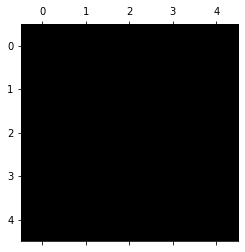

In [12]:
A = np.random.randn(5,5)+1j*np.random.randn(5,5)
plt.spy(A,precision=1e-5)

In [10]:
from IPython.display import clear_output

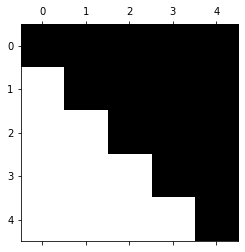

In [14]:
max_iter = 100
for i in range(max_iter):
    clear_output(wait=True)
    Q,R = np.linalg.qr(A)
    A = R.dot(Q)
    plt.spy(A,precision=1e-5)
    plt.pause(.1)    

## reduction to Hessenberg form

In [ ]:
A = np.random.randn(10,10)
A

In [ ]:
n = A.shape[0]
n

In [ ]:
H = A.copy()
Q = np.eye(n)

In [ ]:
k = 0
x = H[k+1:n,k].copy().reshape(-1,1)
tau = np.sign(x[0])*np.linalg.norm(x)
x[0] = tau + x[0]
gamma = x[0]/tau
x[1:] = x[1:]/x[0]
x[0] = 1
tau = tau
x

In [ ]:
x.T.dot(H[k+1:n,:])

In [ ]:
H[k+1:n,:]  = H[k+1:n,:] - gamma*x.dot((x.T.dot(H[k+1:n,:])))
H

In [ ]:
H[:,k+1:n] = H[:,k+1:n] - gamma*(H[:,k+1:n].dot(x)).dot(x.T)

In [ ]:
for k in range(n-1):
    # set up reflector
    x = H[k+1:n,k].copy().reshape(-1,1)
    tau = np.sign(x[0])*np.linalg.norm(x)
    x[0] = tau + x[0]
    gamma = x[0]/tau
    x[1:] = x[1:]/x[0]
    x[0] = 1
    tau = tau
    
    # multiply on the left
    H[k+1:n,:]  = H[k+1:n,:] - gamma*x.dot((x.T.dot(H[k+1:n,:])))
    
    # multiply on the right (reflectors are symmetric)
    H[:,k+1:n] = H[:,k+1:n] - gamma*(H[:,k+1:n].dot(x)).dot(x.T)

In [ ]:
plt.spy(H,precision=1e-5)

## Complex reflectors

In [ ]:
x = np.random.randn(2)+1j*np.random.randn(2)
x

In [ ]:
Q = np.array([[x[0].conj(), x[1].conj()],[-x[1],x[0]]])/np.linalg.norm(x)
Q

In [ ]:
Q.dot(x)

## Implicit qr iteration